## Author: Vaishnav Krishna P
### Intership : Unified Mentor
### project title: Analyzing Amazon Sales data
#### Problem Statement:
* Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.
* Do ETL: Extract-Transform-Load some Amazon dataset and find for me Sales-trend -> month-wise, year-wise, yearly_month-wise
* Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.

In [1]:
# importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing data frame
df = pd.read_csv("Amazon Sales data.csv")

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.shape

(100, 14)

In [5]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

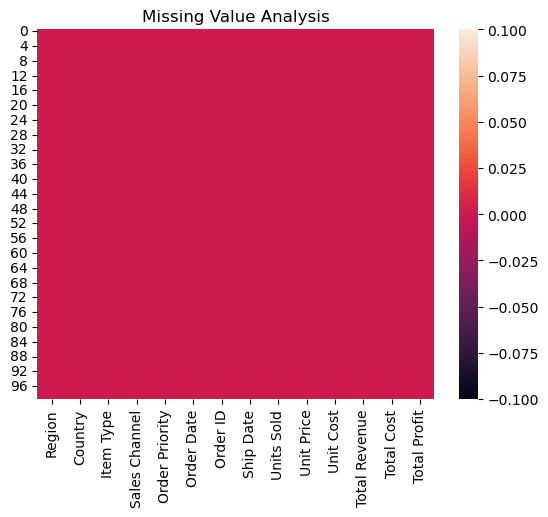

In [6]:
plt.title("Missing Value Analysis")
sns.heatmap(df.isnull())
plt.show()

* The dataset is very clean,There is No missing values.

### Mojority of the Order are from Which Region ?

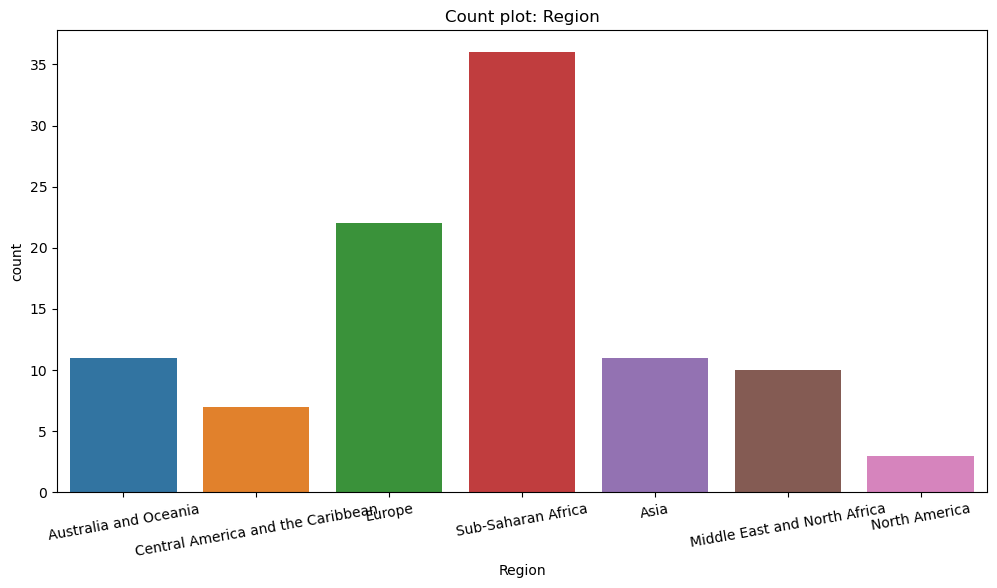

In [7]:
# Count plot for Region
plt.figure(figsize=(12,6))
plt.title("Count plot: Region")
sns.countplot(x = "Region" ,data=df)
plt.xticks(rotation=10)
plt.show()

* Majority of the Orders are from the sub-Saharah Africa.Then Europe.
* Lets,see from sub-Saharah Africa,Which Country

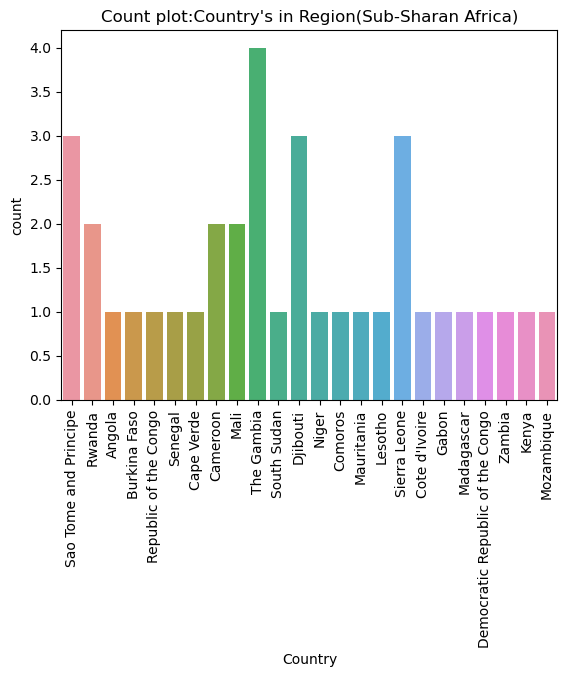

In [9]:
plt.title("Count plot:Country's in Region(Sub-Sharan Africa)")
sns.countplot(x= "Country",data = pd.DataFrame(df["Country"][df["Region"] == "Sub-Saharan Africa"]))
plt.xticks(rotation=90)
plt.show()

* The major countries in the Sub-Saharan African region with high order include Gambia, Djibouti, Sao Tome and Principe, and Sierra Leone.

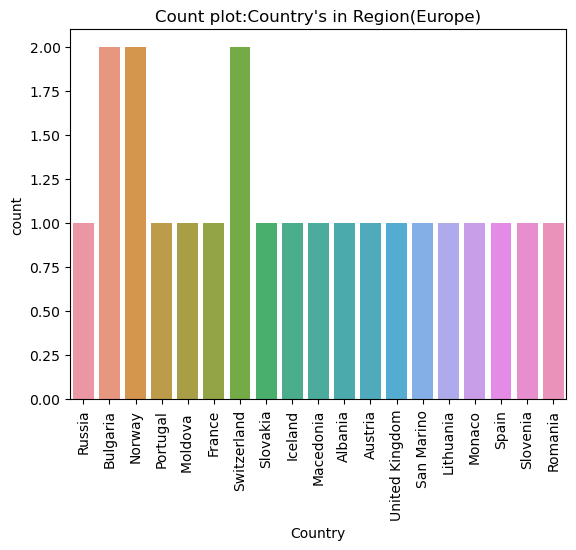

In [8]:
plt.title("Count plot:Country's in Region(Europe)")
sns.countplot(x= "Country",data = pd.DataFrame(df["Country"][df["Region"] == "Europe"]))
plt.xticks(rotation=90)
plt.show()

* The major countries in the Europe region with high order include Bulgeria,Norway,Switzerland.

### Which itemtype is Mostly Ordered?

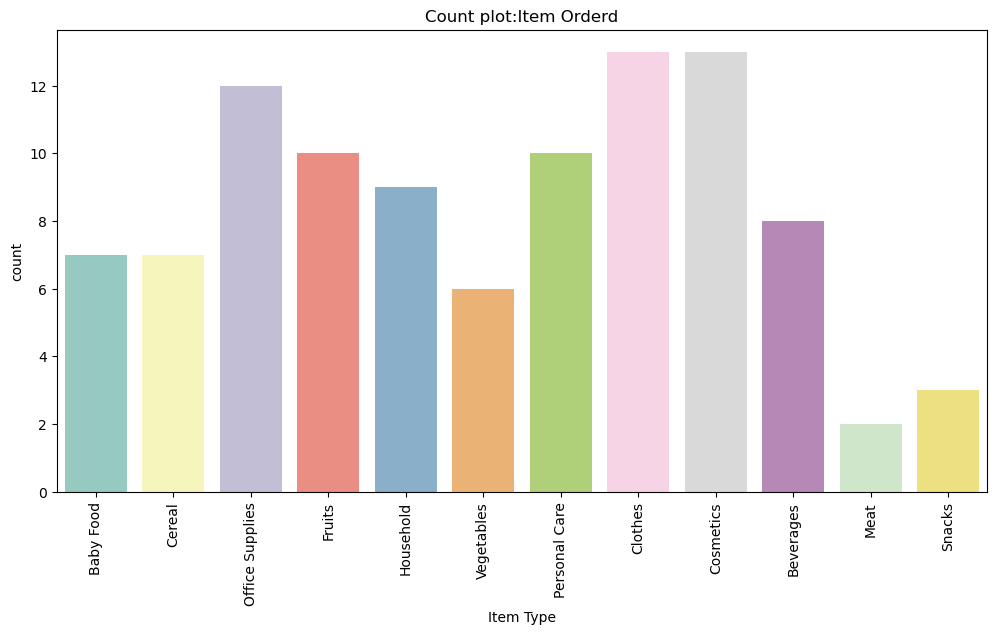

In [12]:
# plotting a count plot using the seaborn library
plt.figure(figsize=(12,6))
plt.title("Count plot:Item Orderd")
sns.countplot(x = "Item Type",data = df,palette="Set3")
plt.xticks(rotation=90)
plt.show()

* Mostly Orderd Things are related to Personal care,Clothes,and Office Shoppies

### Mostly Used Sales channel?

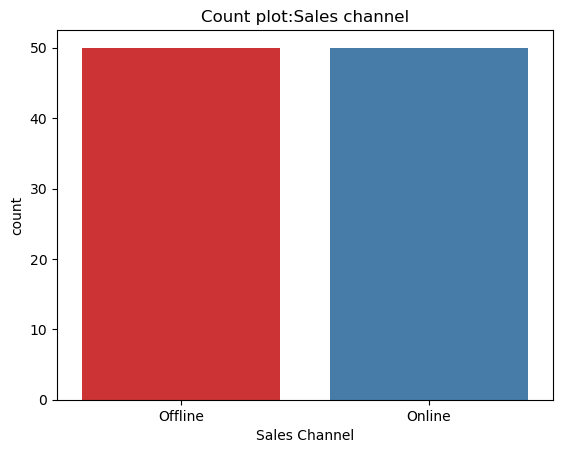

In [13]:
# Now Lets discuss about the Sales channel,How the products are mostly saled 
plt.title("Count plot:Sales channel")
sns.countplot(x="Sales Channel",data = df,palette="Set1")
plt.show()

In [14]:
df["Sales Channel"].value_counts()

Offline    50
Online     50
Name: Sales Channel, dtype: int64

* So, The Product orderd through the Offline and Online are almost same kind of distribution

### Orderd Priority frequency Diestribution

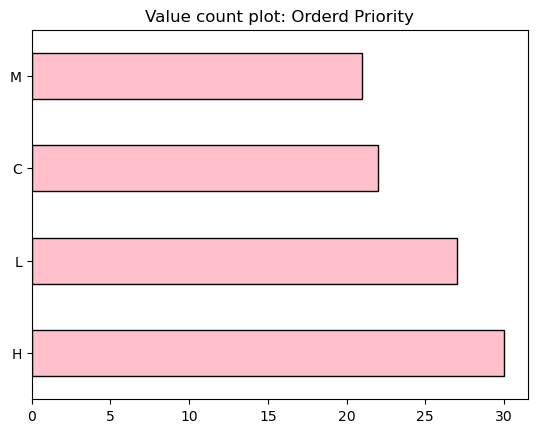

In [51]:
plt.title("Value count plot: Orderd Priority")
df["Order Priority"].value_counts().plot(kind="barh",color="pink",edgecolor="k")
plt.show()

* Majority of the Order are with High or low Priority than Critical and Medium

### Most of the Orders came at which Year,Month ?

In [36]:
# Now Lets see at what year most of the orderds came 
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [38]:
# Taking a column for storing only orderd year
df["Order_year"] = df["Order Date"].dt.year

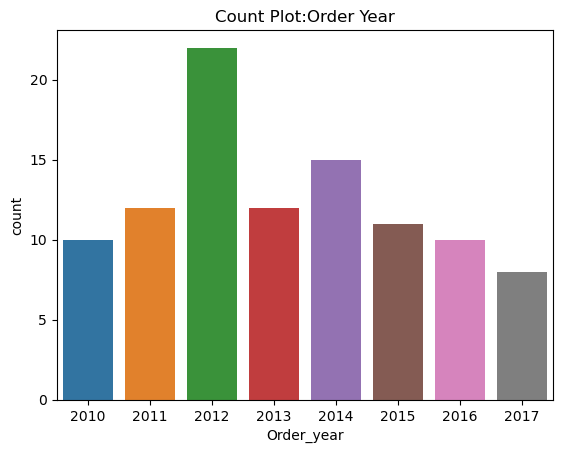

In [41]:
plt.title("Count Plot:Order Year")
sns.countplot(x = "Order_year",data = df)
plt.show()

* From the count plot it is very clear than most of the order came at the year 2012.And the business order is decliing as the year increases from 2012.

In [42]:
# Extracting ordered Month
df["Order_Month"] = df["Order Date"].dt.month

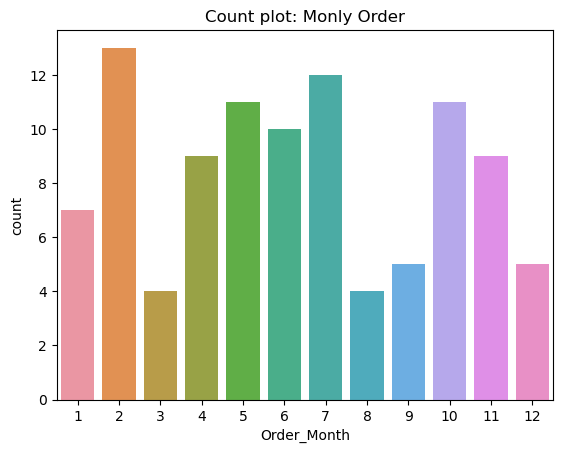

In [47]:
plt.title("Count plot: Monly Order")
sns.countplot(x="Order_Month",data = df)
plt.show()

* Orders are comparitively very less at the months- March,augest,september,December

### How well the company is going now(Profit) ?

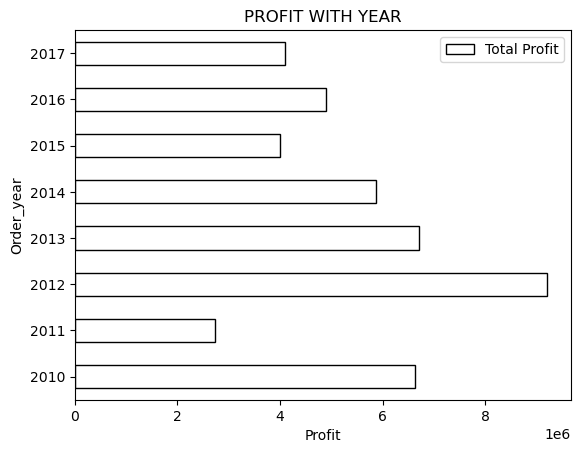

In [65]:
pd.DataFrame(df.groupby("Order_year")["Total Profit"].sum()).plot(kind="barh",color="w",edgecolor="k",title="PROFIT WITH YEAR")
plt.xlabel("Profit")
plt.show()

* From the bar plot it is very clear that,the profit of the company was maximum in the year 2012.And the profit is decreasing per year.